### The purpose of this exercise is to practice my data cleaning skill and using machine learning to fill in missing data in the data set. This skill is essential to a data analyst.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/pclee/Desktop/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### Performing data cleaning on the 'sex' column which has a typo for one of the data points.

#### We do so by looking at its traits and how it compares with the respective sexes to determine the gender.

In [5]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [6]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [7]:
df.groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0   165.000000   168.000000
                  mean     44.5    42.096970    45.854762
                  std       NaN     4.903476     5.366896
                  min      44.5    32.100000    34.600000
                  25%      44.5    37.600000    40.975000
                  50%      44.5    42.800000    46.800000
                  75%      44.5    46.200000    50.325000
                  max      44.5    58.000000    59.600000
culmen_depth_mm   count     1.0   165.000000   168.000000
                  mean     15.7    16.425455    17.891071
                  std       NaN     1.795681     1.863351
                  min      15.7    13.100000    14.100000
                  25%      15.7    14.500000    16.075000
                  50%      15.7    17.000000    18.450000
                  75%      15.7    17.800000    19.250000
                  max      15.7    20.700000    21.500000
flipper_length_mm count     1.0   165.000000   168.000000
                  mean    217.0   197.363636   204.505952
                  std       NaN    12.500776    14.547876
                  min     217.0   172.000000   178.000000
                  25%     217.0   187.000000   193.000000
                  50%     217.0   193.000000   200.500000
                  75%     217.0   210.000000   219.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0   165.000000   168.000000
                  mean   4875.0  3862.272727  4545.684524
                  std       NaN   666.172050   787.628884
                  min    4875.0  2700.000000  3250.000000
                  25%    4875.0  3350.000000  3900.000000
                  50%    4875.0  3650.000000  4300.000000
                  75%    4875.0  4550.000000  5312.500000
                  max    4875.0  5200.000000  6300.000000

Based on:

- culmen length is MALE
- culmen depth is FEMALE
- flipper length is MALE
- body mass is MALE

As majority of the vote is MALE, we will take it as this penguin is a male penguin

In [8]:
df.loc[df['sex'] == '.', 'sex'] = 'MALE'

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

#### As seen from the data set, there are two data points that have absolutely no value for the traits. We can drop them since it's impossible to estimate based on the available data.

In [11]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(thresh=4, inplace=True)

In [13]:
len(df)

342

#### To determine the missing gender values, we will build a KNN model.

#### In order to do so, we have to split the data set into a set for building the model, and another set that contains the null values for the 'sex' column. The latter will be the input to our model to predict the gender. 

In [14]:
df_sex_na = df[df['sex'].isnull()]

Data set for the input to our model later to predict the gender.

In [15]:
df_sex_na

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [16]:
len(df_sex_na)

8

#### Data set to train our model in order for us to predict the gender of those with null values.

In [17]:
df_sex_not_na = df[df['sex'].notnull()]

In [18]:
len(df_sex_not_na)

334

In [19]:
df_sex_not_na

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
X = df_sex_not_na.drop('sex', axis=1)

In [21]:
y = df_sex_not_na['sex']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### We must scale the data used for KNN model, else, the weightage will swing the result greatly. 

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [ ]:
X_train.info()

In [ ]:
X_test.info()

#### To scale the data, the data type has to be numerical instead of a string.

In [26]:
X_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = X_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].astype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 194 to 16
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            233 non-null    object 
 1   island             233 non-null    object 
 2   culmen_length_mm   233 non-null    float64
 3   culmen_depth_mm    233 non-null    float64
 4   flipper_length_mm  233 non-null    float64
 5   body_mass_g        233 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.7+ KB


In [28]:
X_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = X_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].astype('float64')

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 202 to 317
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            101 non-null    object 
 1   island             101 non-null    object 
 2   culmen_length_mm   101 non-null    float64
 3   culmen_depth_mm    101 non-null    float64
 4   flipper_length_mm  101 non-null    float64
 5   body_mass_g        101 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.5+ KB


#### As scaling cannot be performed on object data type, we have to separate the data set into: numeric and non-numeric. Thereafter, we will concatenate the two sets and perform one hot encoding.

In [30]:
X_train_numeric = X_train.select_dtypes(exclude='object')

In [31]:
X_train_non_numeric = X_train.select_dtypes(include='object')

In [32]:
X_test_numeric = X_test.select_dtypes(exclude='object')

In [33]:
X_test_non_numeric = X_test.select_dtypes(include='object')

In [34]:
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)

In [35]:
X_test_numeric_scaled = scaler.transform(X_test_numeric)

In [36]:
X_train_numeric_scaled = pd.DataFrame(data=X_train_numeric_scaled, index=X_train_non_numeric.index, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [37]:
X_train_scaled = pd.concat([X_train_numeric_scaled, X_train_non_numeric], axis=1)

In [38]:
X_train_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species,island
194,1.270659,0.958800,-0.340483,-0.823474,Chinstrap,Dream
22,-1.460723,1.009025,-0.836753,-0.509603,Adelie,Biscoe
92,-1.806698,-0.045698,-1.120337,-1.011797,Adelie,Dream
149,-1.114748,0.456551,-0.553170,-0.572377,Adelie,Dream
156,1.598425,1.310375,-0.269587,-0.603764,Chinstrap,Dream
...,...,...,...,...,...,...
81,-0.186078,0.205426,-0.340483,0.620333,Adelie,Torgersen
93,-0.786982,0.456551,-1.049441,0.306462,Adelie,Dream
69,-0.386379,1.109475,-0.198691,0.306462,Adelie,Torgersen
335,2.035446,-0.598172,2.069976,2.064140,Gentoo,Biscoe


In [39]:
X_test_numeric_scaled = pd.DataFrame(data=X_test_numeric_scaled, index=X_test_non_numeric.index, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [40]:
X_test_scaled = pd.concat([X_test_numeric_scaled, X_test_non_numeric], axis=1)

In [41]:
X_test_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species,island
202,0.760801,-0.397273,-0.127795,-1.105958,Chinstrap,Dream
315,1.252450,-0.748847,1.786392,1.248075,Gentoo,Biscoe
141,-0.604890,0.004527,-0.978545,-0.917635,Adelie,Dream
200,1.379914,0.757901,-0.978545,-1.200119,Chinstrap,Dream
299,0.232734,-0.397273,1.573705,2.189689,Gentoo,Biscoe
...,...,...,...,...,...,...
263,1.033939,-1.100422,1.077434,0.683107,Gentoo,Biscoe
89,-0.914446,0.808125,-0.765858,-0.760700,Adelie,Dream
210,1.143195,0.808125,0.084892,-0.509603,Chinstrap,Dream
23,-1.041911,0.456551,-1.120337,-0.321280,Adelie,Biscoe


In [42]:
X_train_scaled = pd.get_dummies(X_train_scaled)

In [43]:
X_train_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
194,1.270659,0.958800,-0.340483,-0.823474,0,1,0,0,1,0
22,-1.460723,1.009025,-0.836753,-0.509603,1,0,0,1,0,0
92,-1.806698,-0.045698,-1.120337,-1.011797,1,0,0,0,1,0
149,-1.114748,0.456551,-0.553170,-0.572377,1,0,0,0,1,0
156,1.598425,1.310375,-0.269587,-0.603764,0,1,0,0,1,0


In [44]:
X_test_scaled = pd.get_dummies(X_test_scaled)

In [45]:
X_test_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
202,0.760801,-0.397273,-0.127795,-1.105958,0,1,0,0,1,0
315,1.252450,-0.748847,1.786392,1.248075,0,0,1,1,0,0
141,-0.604890,0.004527,-0.978545,-0.917635,1,0,0,0,1,0
200,1.379914,0.757901,-0.978545,-1.200119,0,1,0,0,1,0
299,0.232734,-0.397273,1.573705,2.189689,0,0,1,1,0,0


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
k = list(range(1,20))
param_grid = {'n_neighbors': k}

In [48]:
base_knn_model = KNeighborsClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid_knn_model = GridSearchCV(base_knn_model,param_grid,cv=5,scoring='accuracy')

In [51]:
grid_knn_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [52]:
grid_knn_model.best_params_

{'n_neighbors': 10}

In [53]:
y_pred = grid_knn_model.predict(X_test_scaled)

In [54]:
from sklearn.metrics import classification_report, plot_confusion_matrix

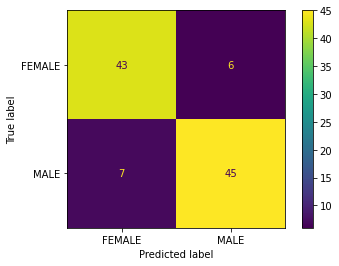

In [55]:
plot_confusion_matrix(grid_knn_model, X_test_scaled, y_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.86      0.88      0.87        49
        MALE       0.88      0.87      0.87        52

    accuracy                           0.87       101
   macro avg       0.87      0.87      0.87       101
weighted avg       0.87      0.87      0.87       101



#### An accuracy of approx. 87% is quite okay. We will accept this model. We will use this model to predict the missing gender values.

In [57]:
X = df_sex_na.drop('sex', axis=1)

In [58]:
y = df_sex_na['sex']

#### Technically, we don't need to create y because y contains null values, of which, we are trying to predict using the KNN model we built.

In [59]:
X[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = X[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].astype('float64')

In [60]:
X_numeric = X.select_dtypes(exclude='object')

In [61]:
X_non_numeric = X.select_dtypes(include='object')

In [62]:
X_numeric_scaled = scaler.transform(X_numeric)

In [63]:
X_numeric_scaled = pd.DataFrame(data=X_numeric_scaled, index=X_non_numeric.index, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [64]:
X_scaled = pd.concat([X_numeric_scaled, X_non_numeric], axis=1)

In [65]:
X_scaled = pd.get_dummies(X_scaled)

In [66]:
X_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
8,-1.788489,0.456551,-0.553170,-0.917635,1,0,0,0,1
9,-0.349961,1.511274,-0.765858,0.055365,1,0,0,0,1
10,-1.114748,-0.045698,-1.049441,-1.137345,1,0,0,0,1
11,-1.114748,0.054752,-1.474816,-0.635151,1,0,0,0,1
47,-1.169375,0.858350,-1.545712,-1.545377,1,0,0,1,0
246,0.105270,-1.451996,1.077434,-0.132957,0,1,1,0,0
286,0.414826,-1.401771,0.935642,0.557559,0,1,1,0,0
324,0.615128,-1.703121,1.077434,0.651720,0,1,1,0,0


#### There is a need to include the 'species_Chinstrap' column, else, the shape of the data frame will not align and the model will throw an error when we want to use it for predicting.

In [67]:
X_scaled['species_Chinstrap'] = 0

In [68]:
y_pred = grid_knn_model.predict(X_scaled)

In [73]:
y_pred

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE'], dtype=object)

In [77]:
df.loc[df['sex'].isnull(), 'sex'] = y_pred

In [78]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [79]:
len(df)

342

In [80]:
df.to_csv('C:/Users/pclee/Desktop/DATA/penguins_size_cleaned.csv')